In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/superstore.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Data/superstore.csv'

In [3]:
df = pd.read_csv('../Data/superstore_cleaned_member2.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:

df.dtypes


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [9]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [10]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [11]:
for col in ['Category', 'Sub-Category', 'Segment', 'Ship Mode', 'Region']:
    print(col, df[col].unique())
    print()

Category ['Furniture' 'Office Supplies' 'Technology']

Sub-Category ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']

Segment ['Consumer' 'Corporate' 'Home Office']

Ship Mode ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Region ['South' 'West' 'Central' 'East']



In [12]:
df[['Sales', 'Quantity', 'Profit', 'Discount']].describe()

,Sales,Quantity,Profit,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,28.656896,0.156203
std,623.245101,2.225110,234.260108,0.206452
min,0.444000,1.000000,-6599.978000,0.000000
25%,17.280000,2.000000,1.728750,0.000000
50%,54.490000,3.000000,8.666500,0.200000
75%,209.940000,5.000000,29.364000,0.200000
max,22638.480000,14.000000,8399.976000,0.800000


In [13]:
df[df['Discount'] > 1]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [14]:
df[(df['Sales'] < 0) | (df['Quantity'] < 0) | (df['Profit'] < 0)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,9921,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176
9921,9922,CA-2014-111360,2014-11-24,2014-11-30,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,...,44312,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.7420,3,0.70,-4.5936
9931,9932,CA-2015-104948,2015-11-13,2015-11-17,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960
9937,9938,CA-2016-164889,2016-06-03,2016-06-06,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772


Q2 – Data Cleaning Summary
During the data cleaning process, the following steps were performed to ensure the dataset was accurate, consistent, and ready for analysis:
- Checked for missing values:
All columns contained 0 missing values, so no imputation or removal was required.
- Checked for duplicate rows:
The dataset contained 0 duplicates, so no rows were dropped.
- Converted date columns:
Order Date and Ship Date were converted from object type to proper datetime format.
- Validated data types:
All other columns had appropriate data types for analysis.
- Checked for inconsistent categories:
Category columns (Category, Sub-Category, Segment, Ship Mode, Region) contained only valid and expected values.
- Checked for outliers and invalid values:
No negative or impossible values were found in Sales, Quantity, Profit, or Discount.
- Validated discount values:
All discount values were within the valid range of 0 to 1.


In [17]:
df[['Sales', 'Profit', 'Discount', 'Quantity']].head()

,Sales,Profit,Discount,Quantity
0,261.9600,41.9136,0.00,2
1,731.9400,219.5820,0.00,3
2,14.6200,6.8714,0.00,2
3,957.5775,-383.0310,0.45,5
4,22.3680,2.5164,0.20,2


In [18]:
df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()

,Sales,Profit,Discount,Quantity
Sales,1.000000,0.479064,-0.028190,0.200795
Profit,0.479064,1.000000,-0.219487,0.066253
Discount,-0.028190,-0.219487,1.000000,0.008623
Quantity,0.200795,0.066253,0.008623,1.000000


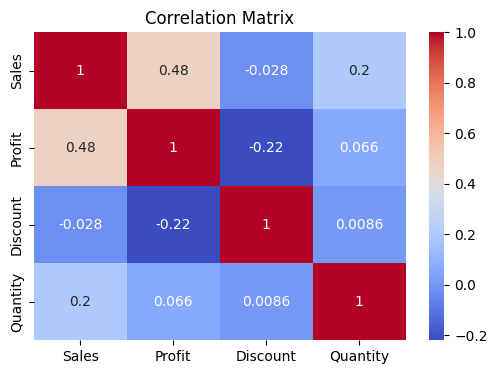

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()

,Sales,Profit,Discount,Quantity
Sales,1.000000,0.479064,-0.028190,0.200795
Profit,0.479064,1.000000,-0.219487,0.066253
Discount,-0.028190,-0.219487,1.000000,0.008623
Quantity,0.200795,0.066253,0.008623,1.000000


Q7 – Correlation Analysis
The correlation analysis examined the relationships between Sales, Profit, Discount, and Quantity. The results show:
- Sales vs Profit (0.479) – Moderate positive correlation
Higher sales generally lead to higher profit.
- Sales vs Discount (–0.028) – Very weak negative correlation
Discounts do not meaningfully affect sales.
- Sales vs Quantity (0.200) – Weak positive correlation
Selling more units slightly increases sales, but not strongly.
- Profit vs Discount (–0.219) – Weak negative correlation
Higher discounts slightly reduce profit.
- Profit vs Quantity (0.066) – Very weak positive correlation
Quantity sold does not strongly influence profit.
- Discount vs Quantity (0.008) – No correlation
Discounts do not affect how many units customers buy.
✅ Overall, profit is influenced more by sales levels and discounting than by quantity sold.
